# Investigating Numpy.random

## About the package

<img src="https://cdn-images-1.medium.com/max/1600/1*mc5YIn7jvo5uwuqBOUDw7Q.jpeg" width = '400'>

Numpy is a package that provides a lot of different functions for generating different types of random numbers, very fast.

### Libraries

In [1]:
import numpy as np #For generating random numbers
from numpy.random import RandomState #Import RandomState separately
import matplotlib.pyplot as plt #For plotting distributions
import seaborn as sns #Mainly used for distplot
import pandas as pd #For data manipulation, if necessary
%matplotlib inline 

## Simple Random Data 

### The Rand() function returns random numbers in the range (0, 1) and form a uniform distrubution.

This distribution is sometimes referred to as the regtangular distribution, and results when every value in the range has equal probability of been chosen. np.random.random performs the same function. I can use this function to create a array of random floats. 

In [3]:
# Generating two random numbers using rand()
y = np.random.rand(2)
print(y)

[0.93646819 0.03780433]


Alternatively, I can call more than one array of a specific size containing random numbers from the standard uniform distribution. 

In [109]:
# Generating two 3x3 arrays 
y = np.random.rand(2, 3, 3)
print(y)

[[[0.69677953 0.23363047 0.58584837]
  [0.62409084 0.83455266 0.73484581]
  [0.01744492 0.09817482 0.22418925]]

 [[0.11091818 0.60836184 0.27274569]
  [0.91185646 0.32428377 0.54360827]
  [0.77077805 0.05561837 0.4751468 ]]]


In small sets, it is difficult to see that the data is uniformly distributed. In fact in a small set my data may not resemble the uniform distribution, at all. However, if I was to randomly select 10,000 numbers and plot this data in a histogram it would be recognizably a regtanular distribution. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


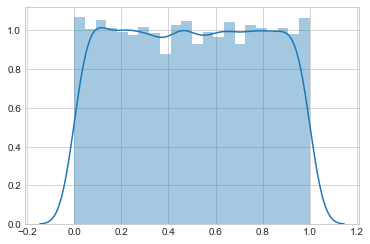

In [36]:
# Generating 10,000 random numbers to look at dist
y = np.random.rand(10000)
sns.set_style('whitegrid')
sns.distplot(y);

As you can see from the histogram of 100,000 random generated samples, this function returns a value between zero and one, and the distribution is generally uniform in shape. 

**Note: Negative dimensions are not allowed.** So np.random.rand(-10) would give an error, as it's impossible to list a negative number of samples. 




### The Randn() function, gives you a random number from the standard normal distribution

The standard normal distribution has mean 0 and standard deviation 1. This function can be used to generated random numbers and arrays, but unlike the rand() function, you would find almost all of your data between - 3 and +3. 

np.random.normal(0, 1) also returns one random number generated from the standard normal distribution.

Let's use this function to randomly generate 1000 numbers and see what normally distributed data looks like. 

In [106]:
#Generating 1000 random numbers
x = np.random.randn(1000)

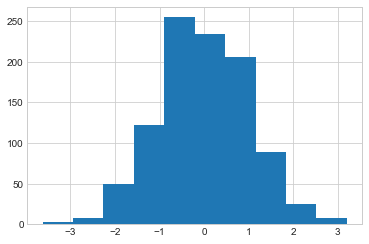

In [107]:
#Plotting the distribution of x in a histogram
plt.hist(x)
plt.show()

As expected, all of my values are between -3 and 3, and most of my values are between - 2 and 2. This is due to the Empirical Rule, which we will encounter in more detail later in this notebook. 

The Normal Distribution is often referred to as the bell curve, and we can see that clearly when we look at it's distribution curve.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


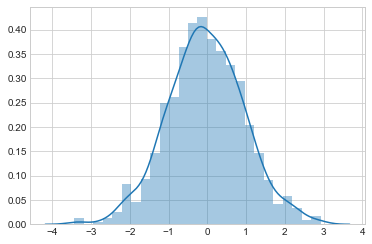

In [39]:
#Looking specifically at the distribution
plt.xticks(range(-5, 5, 1))
sns.set_style('whitegrid')
sns.distplot(x, kde=True);


### The Randint() function returns random integers from the Uniform Distribution.

When using Randint(), you set a low to high interval, from which randomly generated numbers are chosen. The low value is included in integers which may be returned but the high value in not. 

You also set size equal to the number of random integers you want from within that range. If you don't include size, then only one random integer is chosen.


Let's say I want to generate a random number between 2 and 100, excluding 100.

In [9]:
np.random.randint(2, 100)

34

Let's say I want to generate a negative number between - 100 and 0. In this example, randint() will never return 0, but may return - 100.

In [10]:
np.random.randint(-100, 0)

-94

Note, that this function will only work when the smallest number comes first. 

For example if you were to call np.rand.randint(100, 2), you would receive an error. 

Below a set of 2000 random integers are been generated. 

As I have only set one value, this function takes that number to be the high value, and generates numbers in the range 0 to high. Here my high is 30, so my generated set, contains 2000 numbers between 0 and 29 inclusive.

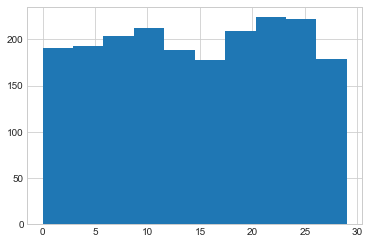

In [4]:
rand_int= np.random.randint(30, size = 2000)
sns.set_style('whitegrid')
plt.xticks(range(0, 31, 5))
plt.yticks(range(0, 251, 50))
plt.hist(rand_int)
plt.show()

### Generating random variables in an interval

There are several functions which you generate a random variable in the interval 0 to 1, not including 1. 

They include the random(), random_sample, and sample() functions. They at first appear to be very similar to the rand() function, but it is not possible to generate multiple arrays of a specific size when using these functions. 

To generate one random number, you can write the function with no parameters, as the default is 1. 

In [102]:
np.random.sample()

0.9512923816895154

If we were to generate 1000 numbers, we can see the the distribution of values is uniform. 

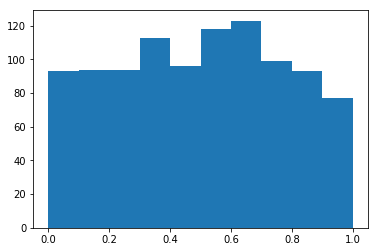

In [37]:
rand_f = np.random.ranf(1000)
plt.hist(rand_f)
plt.show()

We can take an array of random floats form 0 to 1, and then use that to generate values across a different interval. 


In [38]:
#Generating 10 random variables between 0 and 1
rand_f = np.random.random(10)

We can multiply all values in the array by 10, to get an array of floats from 0 to 10. 

In [39]:
10*(rand_f) 

array([3.77933854, 6.0475007 , 4.02784274, 8.85918508, 6.21559372,
       8.02212218, 8.45904065, 4.95552845, 7.13377599, 6.51208352])

We can then subtract 10 from every value in array, and get a set of values from - 10 to 0. 

In [40]:
10*(rand_f) - 10

array([-6.22066146, -3.9524993 , -5.97215726, -1.14081492, -3.78440628,
       -1.97787782, -1.54095935, -5.04447155, -2.86622401, -3.48791648])

And if we wanted an array from - 10 to 10, multiply a set of randomy generated floats by 20 and subtract 10. 

In [41]:
20*(rand_f) - 10 

array([-2.44132292,  2.0950014 , -1.94431453,  7.71837017,  2.43118744,
        6.04424435,  6.91808129, -0.0889431 ,  4.26755199,  3.02416704])

## Permutations

There are two functions which permutate the elements in a given set; np.random.shuffle() and np.random.permutation().

### Shuffle ()

Shuffle() modifies the array or list. So given a set containing the range of values from 0 to 9 inclusive. Shuffle will change the order of elements in that set. Now everytime you call that set in your code, you will be calling the set of shuffled elements. The documentation refers to this as shuffling items in place. 

In [4]:
#Reference: https://stackoverflow.com/questions/47516428/cant-get-random-shuffle-to-work-python-random-shuffle
#Generate and print range 0 to 9 
shuffle_range = np.arange(10)
print('A Range:  ', shuffle_range)
#Shuffle the range
np.random.shuffle(shuffle_range)

A Range:   [0 1 2 3 4 5 6 7 8 9]


In [3]:
#Print modified range
print('Shuffled: ', shuffle_range)

Shuffled:  [0 9 6 3 1 8 4 7 2 5]


Given multi-dimensional arrays, shuffle() works in a similar way. For example, if there is an array containing three 3x3 arrays, this function will modify the order in which the three arrays appear, but the content of each 3x3 array remains unchanged.

In [7]:
# Generating 3 random arrays of positive integers
rand_int = np.random.randint(100)
a = np.around(np.random.rand(3, 3, 3)*rand_int)
print('Array: ')
print(a)

Array: 
[[[11.  1.  6.]
  [ 6. 10.  0.]
  [16.  1.  1.]]

 [[11. 17.  7.]
  [ 7.  0. 14.]
  [16.  4.  2.]]

 [[12. 13.  3.]
  [ 1. 15.  3.]
  [ 7.  5. 14.]]]


In [8]:
print('Shuffled: ')
np.random.shuffle(a)
print(a)
#References: https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy 

Shuffled: 
[[[11.  1.  6.]
  [ 6. 10.  0.]
  [16.  1.  1.]]

 [[11. 17.  7.]
  [ 7.  0. 14.]
  [16.  4.  2.]]

 [[12. 13.  3.]
  [ 1. 15.  3.]
  [ 7.  5. 14.]]]


Given a list, the output will remain a list. 

In [42]:
#Generate a range and set this as a list
a_list = np.arange(10).tolist()
#Shuffle
np.random.shuffle(a_list)
a_list

[7, 4, 5, 6, 0, 3, 8, 2, 9, 1]

### Permutation()

Permutation() makes a copy of the inputted array or list. It's output is the shuffled range of elements in the form of an array. 

Permutation() makes no changes to the original set. So, if I print my original set, call permutation(), and then print my original set again, I can see that nothing has changed in my original set. 

In [27]:
permute_range=np.arange(10)
print('A Range: ', permute_range)
np.random.permutation(permute_range)
print('A Range: ', permute_range)

A Range:  [0 1 2 3 4 5 6 7 8 9]
A Range:  [0 1 2 3 4 5 6 7 8 9]


In this case, I will have to outpit or print np.random.permutation, in order to see my permutated array.

In [28]:
print('Permutation: ', np.random.permutation(permute_range))

Permutation:  [8 7 0 4 1 3 9 6 5 2]


If I want to permutate or shuffle all the positive integers in a range from 0 to some number (n), I can call permutation() with (n + 1) as a parameter.

For example, I can permutate the numbers 0 to 10, not including 10 like this:

In [43]:
np.random.permutation(10)

array([6, 5, 1, 2, 0, 3, 9, 4, 8, 7])

When I have a multi-dimensional array, permutations() works in a very similar way. Let's look at three 3x3 arrays.

In [23]:
# Generating 3 random arrays of positive integers
rand_int = np.random.randint(100)
a = np.around(np.random.rand(3, 3, 3)*rand_int)
print('Array: ')
print(a)

Array: 
[[[12. 32.  6.]
  [21. 35. 13.]
  [18. 21. 36.]]

 [[ 2. 38. 32.]
  [23.  1.  6.]
  [13. 11. 20.]]

 [[19. 32.  6.]
  [27. 23. 11.]
  [ 3. 24.  3.]]]


Permutation() will shuffle the three arrays, but rows and columns within each array will remain unshuffled.

In [24]:
#Permutates the arrays, but keeps the rows/columns in each array the same
print('Permuation: ')
print(np.random.permutation(a))

Permuation: 
[[[ 2. 38. 32.]
  [23.  1.  6.]
  [13. 11. 20.]]

 [[12. 32.  6.]
  [21. 35. 13.]
  [18. 21. 36.]]

 [[19. 32.  6.]
  [27. 23. 11.]
  [ 3. 24.  3.]]]


If I only input one 3x3 array, permutation() would return the exact same array in the same order

Given a list, permutations() will always output an array. As shown here;

In [35]:
a_list = np.arange(10).tolist()

In [36]:
np.random.permutation(a_list)

array([0, 8, 5, 4, 3, 7, 6, 9, 1, 2])

## Distributions

The distribution refers to the spread of data in a set. 

We have already encountered uniform and normally distributed data in the Simple Random Data package. 

### Uniform Distribution

Using np.random.uniform, returns a float number between a low and high range. You can set size equal to a number, to return that many randomly generated values. Similar to the randint() function, your size cannot be a negative dimension or you receive an error. 

But in contrast to the randint() function, it is not necessary to call the low value first. 

**For example** np.random.uniform(30, 1) and np.random.uniform(1, 30) will both return a value between 1 and 30. 

In [44]:
t = np.random.uniform(30, 1)
print(t)
t = np.random.uniform(1,30)
print(t)

25.595509992201706
11.924197565603377


Let's begin by generating a random list of 30 numbers between 0 and 20. 

As the default low value is already zero, I only need to set my high value as 20, and specify size 30.

In [130]:
uni=np.random.uniform(20, size =30)
uni=np.around(uni, decimals=3).tolist()
print(uni)

[1.709, 13.39, 12.967, 14.46, 5.449, 13.481, 2.681, 6.21, 9.265, 19.75, 1.008, 7.836, 6.903, 7.998, 3.237, 19.265, 10.731, 5.474, 13.974, 3.727, 12.899, 19.834, 4.619, 2.774, 4.36, 15.953, 15.491, 14.539, 10.901, 4.692]


If I wanted to generate 20 numbers between 300 and 600, I would have to include both 300 and 600 as parameters and set the size = 20.

In [131]:
uni_sample=np.random.uniform(300, 600, size=20)
print(uni_sample)

[414.29965612 461.85945332 466.78718876 541.57545118 539.21997101
 382.66446414 396.196832   482.81539733 475.19108946 547.00591411
 421.50748957 307.75215885 403.28053638 304.10636866 505.5092978
 594.97309518 360.95786209 355.45915494 527.68895202 572.95248849]


Plotting these values on a histogram, it's very likely that my distribution will not appear Uniform. This is because I have a very small set with only 20 samples. So let's generate a second uniform dataset with 1000 randomly generated values. Which dataset is more representative of the Uniform Distribution?

In [132]:
uni_sample2=(np.random.uniform(300, 600, size= 1000))

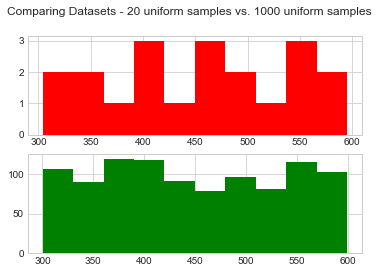

In [133]:
fig = plt.figure()
fig.suptitle('Comparing Datasets - 20 uniform samples vs. 1000 uniform samples')

ax1 = plt.subplot(2,1,1)
ax1.hist(uni_sample, color = 'r')


ax2 = plt.subplot(2, 1, 2)
ax2.hist(uni_sample2, color = 'g')

plt.show()

So increasing the size of our set to 1000 values, instead of 20, gives us a more uniform spread of data. 

This function generates a float number between two values, and as I have set my values to be integers, there is an infinite number of possibile outcomes. The uniform function returns an even spread of values in the low to high interval, but the histogram above should not be taken to imply that every value between 300 and 600 is represented. 

There is an infinite number of floats between 300 and 301. Likewise there are an infinite number of values between 300 and 600.

### Binomial Distribution

The Binomial Distribution in probability is the distribution of successes in  Binomial or Bernoulli trials. 

In a Bernoulli trial;
* There are n independent trials
* Each trial has only two possible outcomes, ie Heads or Tails, Pass or Fail etc.
* The probability of success is the same in each trial, and is denoted with the letter p

So the random.binomial() function takes the same parameters and can be used to simulate probability experiments.

#### Flipping a Coin

If you flip a coin you can get either heads or tails, and each has a 50% chance of success. Let's say that I flip a coin 100 times, and I want to get heads. 

The binomial() function can simulate that experiment. 

The first parameter is the number of trials, which is 100. The second parameter is the probability of getting Heads, which is 0.5, and the final parameter is the number of times this experiment is run. I only did this once, so I set the number of tests to be 1. 

In [135]:
heads = np.random.binomial(100, 0.5, 1)
print('I got %.0f heads, and %.0f tails in 100 trials' % (sum(heads), 100 - sum(heads)))

I got 45 heads, and 55 tails in 100 trials


Now what if I have 30 people all doing the same experiment. 

30 people each flip a coin 100 times and record their results, then we'd have 3000 flips of a coin. Our experimental probability should be even closer to our expected probability with that many trials. So let's run that simulation and see what we get.

In [136]:
new_heads = np.random.binomial(100, 0.5, 30)
print('We get %.0f heads, and %.0f tails in 3000 trials' % (sum(new_heads), 30*100 - sum(new_heads)))

We get 1489 heads, and 1511 tails in 3000 trials


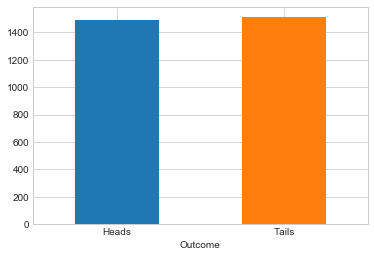

In [137]:
sum_heads = (np.sum(new_heads))
sum_tails = (3000 - sum_heads)

df = pd.DataFrame({'Outcome':['Heads', 'Tails'], 'Freq':[sum_heads, sum_tails]})
ax = df.plot.bar(x = 'Outcome', y = 'Freq', legend = None, rot= 0)

Plotting the data from my 30 helpers, shows that there are no outliers with most getting between 40 and 60 heads when they flipped the coin

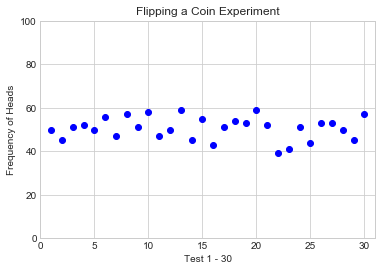

In [119]:
x = np.arange(1, 31)
plt.plot(x, new_heads, 'bo')
plt.xlabel('Test 1 - 30')
plt.ylabel('Frequency of Heads')
plt.title('Flipping a Coin Experiment')
plt.ylim(0, 100)
plt.xlim(0, 31)
plt.show()

### Normal Distribution

A Normal Distribution is symmetrical about the mean of the set of data. 

To generate a set of values which follow the normal distribution, numpy.random provide two different functions; the standard_normal() and normal() functions.

Standard_normal() returns a number(s) which fit the standard normal distribution, where the mean is 0 and standard deviation is 1. As the mean and deviation are set by default, the only parameter to be entered is the number of values we want to generate. Here, I have generated a set with 500 values

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


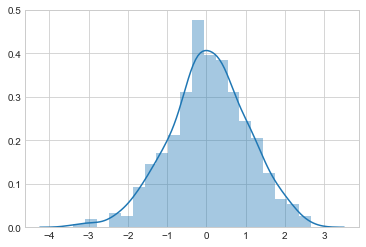

In [50]:
st_norm = np.random.standard_normal(500)
sns.distplot(st_norm);

I can see that the distribution is bell shaped as expected. When generating data that fits a specific distribution it might be important to generate a very large set to get a representative sample. Then it would be possible to use 

In [95]:
st_norm2 = np.random.standard_normal(100)

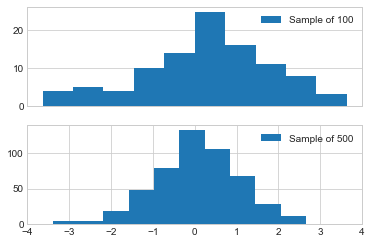

In [98]:
ax1 = plt.subplot(2, 1, 1)
ax1.hist(st_norm2, label = 'Sample of 100')
ax1.xaxis.set_visible(False) 
sns.set_style('whitegrid')
plt.legend()

ax2 = plt.subplot(2, 1, 2)
ax2.hist(st_norm, label = 'Sample of 500')
plt.xlim(-4, 4)
plt.legend()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


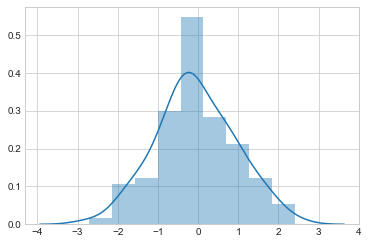

In [91]:
sns.distplot(st_norm2);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


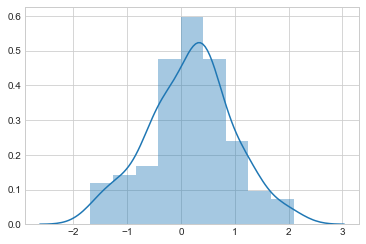

In [89]:
sample = np.random.choice(st_norm, 100)
sns.distplot(sample);

To generate a random number that fits a different normal distribution, we need to know both the mean and the standard deviation of that set. Then we can use the np.random.normal() function

The Empirical Rule states that, in a normally distributed set, 68% of data is within one standard deviation of the mean, but 99.7% of data is found with in three standard deviations of the mean, as shown below.


<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/1106px-Empirical_rule_histogram.svg.png" width = '400' align = 'left'>

Therefore when we randomly generate number that fit a normal distrbution we can expect to get a distribution like the one above. 

If I was to randomly generate a number from a set, with mean 32 and standard deviation 5, I would most likely get a value between 22 and 42, as 95% of data is within two standard deviation of the mean.

In [209]:
# Generating a random number from the normal dist., with mean 32 and st.dev. 5
norm_x = np.around(np.random.normal(32, 5), decimals = 3)
norm_x

30.347

Below I have generated 1000 values, that model normally distributed data with mean 32, and standard deviation 5. 

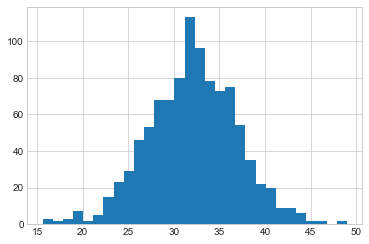

In [210]:
norm= np.random.normal(32, 5, 1000)
plt.hist(norm, bins=30)
sns.set_style('whitegrid')
plt.show()


### Chi-Squared Distribution

The Chi-Squared Test is a type of hypothesis test, which determines if there is any relationship between observed and expected values in more than one category of a population. So it's best suited to categorical data.  


The np.random.chisquare() modules takes two parameters, df or degrees of freedom and size of sample.

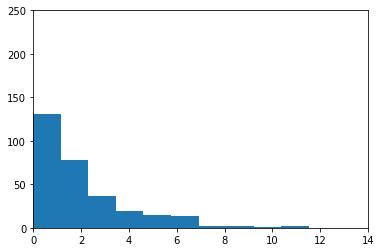

In [7]:
s1 = np.random.chisquare(2, 300)
plt.hist(s1)
plt.xlim(0, 14, 2)
plt.ylim(0, 250, 10)
plt.show()

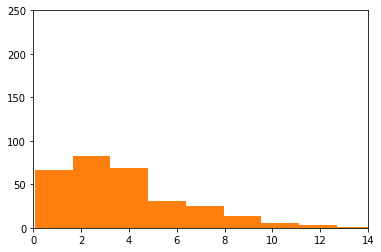

In [8]:
s2 = np.random.chisquare(4, 300)
plt.hist(s2, color = 'tab:orange')
plt.ylim(0, 250, 10)
plt.xlim(0, 14, 2)
plt.show()

In [9]:
s3 = np.random.chisquare(6, 300)
s4 = np.random.chisquare(12, 300)

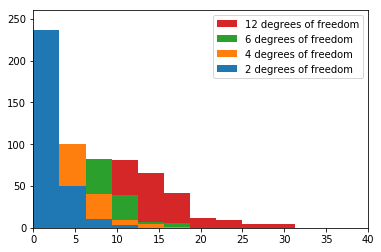

In [10]:
plt.hist([s1, s2, s3, s4], label = ['2 degrees of freedom', '4 degrees of freedom', '6 degrees of freedom', 
                                    '12 degrees of freedom'], histtype = 'stepfilled')
plt.xlim(0, 40, 5)
plt.ylim(0, 260, 50)
plt.legend()
plt.show()

### FIve

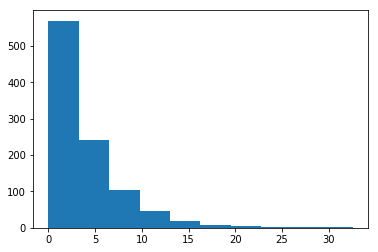

In [23]:
dist_gama = np.random.gamma(1, 4, 1000)
plt.hist(dist_gama)
plt.show()

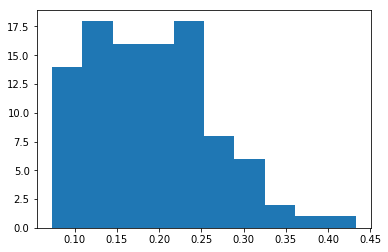

In [18]:
beta_hist = np.random.beta(4.5, 20, 100)
plt.hist(beta_hist)
plt.show()

## Seeds and Pseudo-random Numbers

The numbers generated by all of the functions above are pseudo random numbers. 

The seed is essentially the place we choose to begin our random generator. If it always begins in the same place, then we can be guaranteed the same outputs. 

To set the seed, we call np.random.seed(), and input any integer between  0 and (2^32) - 1 as the parameter. It can also take arrays of similar integers. 

For the purposes of my investigation, I will set the seed to be 42. It's a commonly used seed that appears to be a Hitchhikers Guide to the Galaxy reference. 

In [290]:
np.random.seed(42)

So my seed is set. Now if I want to print the exact same output again, I first need to remind my machine of that seed. 

To do this we use the RandomState() class, and set the parameter to be the same as we previously had in the seed() function.  Then call the array of randomly generated values you want, and if we call the same array twice, you will get the exact same output both times.

_Note that in my libraries, I hav already imported RandomState from np.random._

Let's begin by outputting 5 random numbers between 0 and 10.

In [316]:
r = RandomState(42)
r.uniform(0, 10, 5)

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ])

In [317]:
r = RandomState(42)
r.uniform(0, 10, 5)

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ])

In [310]:
r = RandomState(42)
r.randn(10)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [311]:
r = RandomState(42)
r.randn(10)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [312]:
r = RandomState(42)
r.normal()

0.4967141530112327

In [313]:
r = RandomState(42)
r.normal()

0.4967141530112327

## References

* [NumPy v1.15 Manual, Random sampling (numpy.random)](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)
* [Seaborn: Statistical Data Visualisation Tutorial](https://seaborn.pydata.org/tutorial.html)
    * [Barplot documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)
* [Chi - Squared Test (wikipedia page](https://en.wikipedia.org/wiki/Chi-squared_test)
* [Chi-Square Independence test, an example on www.spss-tutorials.com](https://www.spss-tutorials.com/chi-square-independence-test/)
* Stack Overflow - Webpages consulted
    * [Difference between np.random.seed and np.random.RandomState](https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate)
    * [Random Seed: What does it do?](https://stackoverflow.com/questions/22639587/random-seed-what-does-it-do)